In [1]:
%autosave 5

Autosaving every 5 seconds


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from glob import glob
files = glob('*.csv')
files

['cart.csv', 'cart2.csv', 'metrics.csv']

In [8]:
cart = pd.read_csv(files[0], parse_dates=['date'])
cart

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,NaN,3.57
3,2021-03-01,potato,2.0,NaN
4,NaT,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,NaN,5.0,3.68


In [10]:
cart.dtypes

date      datetime64[ns]
name              object
amount           float64
price            float64
dtype: object

In [12]:
cart['amount'].astype('Int32')

0       7
1      12
2    <NA>
3       2
4       6
5       3
6       5
Name: amount, dtype: Int32

In [13]:
cart.isnull()

,date,name,amount,price
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,False,False,False
6,False,True,False,False


In [15]:
cart.isnull().any(axis=1)

0    False
1    False
2     True
3     True
4     True
5    False
6     True
dtype: bool

In [16]:
files

['cart.csv', 'cart2.csv', 'metrics.csv']

In [20]:
metric = pd.read_csv(files[-1])
metric.sample(10)

,time,name,value
27,2021-07-13 14:37:04.821,cpu,2.952000e+01
50,2021-07-13 14:37:16.305,cpu,2.954000e+01
97,2021-07-13 14:37:38.316,mem,2.274929e+08
42,2021-07-13 14:37:12.477,mem,2.275487e+08
12,2021-07-13 14:36:58.122,mem,2.275156e+08
65,2021-07-13 14:37:23.004,cpu,3.298000e+01
89,2021-07-13 14:37:34.488,cpu,3.946000e+01
60,2021-07-13 14:37:21.090,mem,2.275347e+08
7,2021-07-13 14:36:55.251,cpu,3.188000e+01
57,2021-07-13 14:37:19.176,mem,2.275363e+08


In [22]:
metric.groupby('name').describe()

value                                                                  \
     count          mean           std     min           25%           50%   
name                                                                         
CPU    1.0  3.040000e+01           NaN   30.40  3.040000e+01  3.040000e+01   
cpu   49.0  3.645633e+01  3.977927e+01  -32.14  2.956000e+01  3.157000e+01   
mem   50.0  2.229711e+08  3.217637e+07  295.00  2.275070e+08  2.275188e+08   

                                 
               75%          max  
name                             
CPU   3.040000e+01         30.4  
cpu   3.507000e+01        300.9  
mem   2.275342e+08  227556054.0

In [23]:
metric['name'].value_counts()

mem    50
cpu    49
CPU     1
Name: name, dtype: int64

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

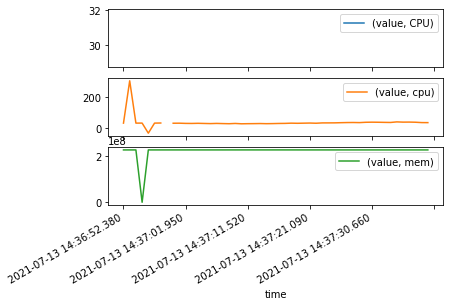

In [25]:
pd.pivot(metric, index='time', 
         columns='name').plot(subplots=True)

In [27]:
metric.query(
    'name == "cpu" & (value < 0 | value > 100)'
)

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


In [30]:
mem = metric[metric['name'] == 'mem']['value']
z_score = (mem - mem.mean()) / mem.std()
bad_mem = mem[z_score.abs() > 2]
bad_mem

6    295.0
Name: value, dtype: float64

In [31]:
files

['cart.csv', 'cart2.csv', 'metrics.csv']

In [32]:
cart2 = pd.read_csv(files[1], parse_dates=['date'])
cart2

,date,name,amount,price
0,2021-03-01,carrot,7,5.73
1,2021-03-01,egg,12,1.70
2,2021-03-01,egg,12,1.20
3,2021-03-01,milk,1,3.57
4,2021-03-02,potato,3,2.17
5,2021-03-02,potato,3,2.17


In [36]:
metric.query(
    'name == "cpu" & (value < 0 | value > 100)'
)

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


In [37]:
cart

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,NaN,3.57
3,2021-03-01,potato,2.0,NaN
4,NaT,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,NaN,5.0,3.68


In [44]:
cart2.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [45]:
cart2[cart2.duplicated()]

,date,name,amount,price
5,2021-03-02,potato,3,2.17


In [43]:
cart2.duplicated(['date', 'name'])

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

In [49]:
files = glob('*.csv')
files

['cart.csv', 'cart2.csv', 'metrics.csv', 'ships.csv']

In [50]:
ships = pd.read_csv(files[-1])
ships

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


In [51]:
ships.dtypes

name     object
lat     float64
lng     float64
dtype: object

In [56]:
# ! pip install pandera

In [60]:
df = pd.read_csv('ships2.csv')
df

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN
4,,20.664875,-80.709777


In [61]:
df.isnull().any(axis=1)

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [62]:
df.iloc[-1]['name']

' '

In [64]:
df['name'] = df['name'].str.strip()

In [65]:
df.isnull().any(axis=1)

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [66]:
df.iloc[-1]['name']

''

In [67]:
mask = df['name'].str.strip() == ''
mask

0    False
1    False
2    False
3    False
4     True
Name: name, dtype: bool

In [69]:
df.loc[mask, 'name'] = np.nan

In [71]:
df[df.isnull().any(axis=1)]

,name,lat,lng
3,Empress,NaN,NaN
4,NaN,20.664875,-80.709777
